In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.4.1
TensorFlow 2.0 Hello World


In [3]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

In [4]:
from tensorflow import keras
from keras import models
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
import seaborn as sns

In [5]:
def evaluate_preds(true_values, pred_values, save=False, vis=True):
    """Оценка качества модели и график preds vs true"""
    if vis:
        print("R2:\t" + str(np.round(r2(true_values, pred_values), 5)) + "\n" +
              "RMSE:\t" + str(np.round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
              "MSE:\t" + str(np.round(mse(true_values, pred_values), 3)))
        
        plt.figure(figsize=(8,8))
        
        sns.scatterplot(x=pred_values, y=true_values)
        plt.plot([0, np.max(pred_values)], [0, np.max(true_values)], linestyle='--', color='black')  # диагональ, где true_values = pred_values
        
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title('True vs Predicted values')
        
        if save == True:
            plt.savefig(REPORTS_FILE_PATH + 'report.png')
        plt.show()

    return np.round(r2(true_values, pred_values), 5), np.round(np.sqrt(mse(true_values, pred_values)), 3), np.round(mse(true_values, pred_values), 3)

In [6]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
#X_train.reshape(13,339)
X_train.shape

(339, 13)

In [8]:
y_test.shape

(167,)

# Тестовый прогон

In [15]:
model_test = models.Sequential()
model_test.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model_test.add(layers.Dense(1024, activation='relu'))
model_test.add(layers.Dense(1))

In [16]:
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              14336     
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 1,064,961
Trainable params: 1,064,961
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_test.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])

hist1=model_test.fit(X_train, y_train, epochs=5)

Epoch 1/5
11/11 [==============================] - 2s 3ms/step - loss: 725.0696 - mean_absolute_error: 22.6499
Epoch 2/5
11/11 [==============================] - 0s 3ms/step - loss: 127.0606 - mean_absolute_error: 8.2255
Epoch 3/5
11/11 [==============================] - 0s 3ms/step - loss: 83.6938 - mean_absolute_error: 7.3524
Epoch 4/5
11/11 [==============================] - 0s 3ms/step - loss: 85.8321 - mean_absolute_error: 6.3248
Epoch 5/5
11/11 [==============================] - 0s 3ms/step - loss: 65.2784 - mean_absolute_error: 5.7163


In [12]:
y_pred_test = model_test.predict(X_test)
y_pred_test.shape

(167, 1)

In [ ]:
y_test.shape

(167,)

R2:	0.24352
RMSE:	7.566
MSE:	57.249


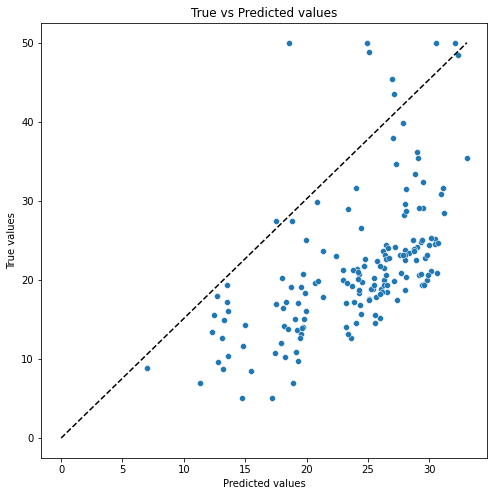

(0.24352, 7.566, 57.249)

In [13]:
evaluate_preds(y_test, y_pred_test.copy().flatten() )

# Варьируем количество нейронов, слоёв и прочее

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(1))

model_2 = models.Sequential()
model_2.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_2.add(layers.Dense(1))

model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1))

model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(1))

In [ ]:
l = [2, 1, 5, 10]
i = 0

res_list = []

for model in [model_1, model_2, model_3, model_4]:

  res = {}

  model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['l'] = l[i]
  i += 1
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)


In [ ]:
from pprint import pprint

In [ ]:
pprint(res_list)

[{'l': 2, 'mse': 46.89845, 'r2': 0.38029, 'rmse': 6.84824},
 {'l': 1, 'mse': 52.51999, 'r2': 0.30601, 'rmse': 7.24707},
 {'l': 5, 'mse': 56.71774, 'r2': 0.25054, 'rmse': 7.53112},
 {'l': 10, 'mse': 47.93904, 'r2': 0.36654, 'rmse': 6.9238}]


5 cлоев оптимальнее

In [ ]:
res_list = []

for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:

  res = {}

  model_n = models.Sequential()
  model_n.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
  model_n.add(layers.Dense(n, activation='relu'))
  model_n.add(layers.Dense(1))

  model_n.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_n.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_n.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


  res['n'] = n
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)


In [ ]:
pprint(res_list)

[{'mse': 806.36053, 'n': 1, 'r2': -9.65508, 'rmse': 28.39649},
 {'mse': 3296.76469, 'n': 2, 'r2': -42.56276, 'rmse': 57.41746},
 {'mse': 6809.33559, 'n': 4, 'r2': -88.97714, 'rmse': 82.5187},
 {'mse': 2129.46278, 'n': 8, 'r2': -27.13828, 'rmse': 46.1461},
 {'mse': 183.25785, 'n': 16, 'r2': -1.42153, 'rmse': 13.53728},
 {'mse': 87.79199, 'n': 32, 'r2': -0.16007, 'rmse': 9.36974},
 {'mse': 69.64467, 'n': 64, 'r2': 0.07973, 'rmse': 8.34534},
 {'mse': 53.21656, 'n': 128, 'r2': 0.29681, 'rmse': 7.29497},
 {'mse': 54.02212, 'n': 256, 'r2': 0.28616, 'rmse': 7.34997},
 {'mse': 59.4904, 'n': 512, 'r2': 0.21391, 'rmse': 7.713},
 {'mse': 49.63074, 'n': 1024, 'r2': 0.34419, 'rmse': 7.04491},
 {'mse': 67.1237, 'n': 2048, 'r2': 0.11304, 'rmse': 8.19291}]


1024 нейрона - оптимальнее

# Типы оптимизаторов

In [ ]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:

  res = {}

  model_o = models.Sequential()
  model_o.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
  model_o.add(layers.Dense(1024, activation='relu'))
  model_o.add(layers.Dense(1))

  model_o.compile(optimizer=opt,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error'])
  
  model_o.fit(X_train, y_train, epochs=5,
              verbose = False)
  y_pred_test = model_o.predict(X_test)

  #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)
  #print(y_pred_test)

  res['o'] = opt
  res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
  res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
  res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

  res_list.append(res)

In [ ]:
pprint(res_list)

[{'mse': 49.28974, 'o': 'adam', 'r2': 0.3487, 'rmse': 7.02067},
 {'mse': 293.86982, 'o': 'RMSprop', 'r2': -2.88313, 'rmse': 17.14263},
 {'mse': 55.38958, 'o': 'Ftrl', 'r2': 0.26809, 'rmse': 7.44242},
 {'mse': 57.32117, 'o': 'Nadam', 'r2': 0.24257, 'rmse': 7.57107},
 {'mse': 62.62362, 'o': 'Adamax', 'r2': 0.1725, 'rmse': 7.91351}]


'adam' - лучше

# Большой тест всего со всем

In [ ]:
res_list = []

for opt in ['adam', 'RMSprop', 'Ftrl', 'Nadam', 'Adamax']:
  for n in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    for metrics in ['mean_absolute_error', 'mean_squared_error']:
      for loss in [tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanAbsoluteError()]:
        model_1 = models.Sequential()
        model_1.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_1.add(layers.Dense(n, activation='relu'))
        model_1.add(layers.Dense(1))

        model_2 = models.Sequential()
        model_2.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_2.add(layers.Dense(1))

        model_3 = models.Sequential()
        model_3.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(n, activation='relu'))
        model_3.add(layers.Dense(1))

        model_4 = models.Sequential()
        model_4.add(layers.Dense(n, activation='relu', input_shape=(X_train.shape[1],)))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(n, activation='relu'))
        model_4.add(layers.Dense(1))

        l = [2, 1, 5, 10]
        i = 0

        for model in [model_1, model_2, model_3, model_4]:

          res = {}

          model.compile(optimizer='adam',
                      loss=loss,
                      metrics=metrics)
          
          model.fit(X_train, y_train, epochs=5,
                      verbose = False)
          y_pred_test = model.predict(X_test)

          #r2, rmse, mse = evaluate_preds(y_test, y_pred_test.flatten(), vis=False)


          res['l'] = l[i]
          res['n'] = n
          res['opt'] = opt
          res['metrics'] = metrics
          res['loss'] = loss
          i += 1
          res['r2'] = round(r2(y_test, y_pred_test.copy().flatten()),5)
          res['rmse'] = round(np.sqrt(mse(y_test, y_pred_test.copy().flatten())),5)
          res['mse'] = round(mse(y_test, y_pred_test.copy().flatten()),5)

          print(res)

          res_list.append(res)

{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15868, 'rmse': 23.2757, 'mse': 541.75827}
{'l': 1, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -0.3158, 'rmse': 9.97888, 'mse': 99.57799}
{'l': 5, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15869, 'rmse': 23.27571, 'mse': 541.75864}
{'l': 10, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanSquaredError object at 0x7f5b783bbd30>, 'r2': -6.15868, 'rmse': 23.27571, 'mse': 541.75848}
{'l': 2, 'n': 1, 'opt': 'adam', 'metrics': 'mean_absolute_error', 'loss': <tensorflow.python.keras.losses.MeanAbsoluteError object at 0x7f5b783bbd68>, 'r2': -6.15858, 'rmse': 23.27555, 'mse': 541

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(res_list)

In [ ]:
df.sort_values(by='r2', ascending=False).head(10)

,l,n,opt,metrics,loss,r2,rmse,mse
569,1,2048,Ftrl,mean_squared_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.53451,5.93530,35.22773
353,1,1024,RMSprop,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.50062,6.14757,37.79262
749,1,1024,Nadam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49447,6.18530,38.25794
381,1,2048,RMSprop,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.49020,6.21137,38.58106
949,1,2048,Adamax,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48889,6.21932,38.68000
157,1,512,adam,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48823,6.22337,38.73030
757,1,2048,Nadam,mean_absolute_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.48562,6.23922,38.92785
177,1,2048,adam,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47995,6.27350,39.35676
909,1,256,Adamax,mean_squared_error,<tensorflow.python.keras.losses.MeanAbsoluteEr...,0.47817,6.28422,39.49138
288,2,64,RMSprop,mean_absolute_error,<tensorflow.python.keras.losses.MeanSquaredErr...,0.47793,6.28565,39.50944
